In [14]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import glob

data_directory = './data/lunar/data/test/data/S15_GradeA/'
row = glob.glob(os.path.join(data_directory, '*.mseed'))


In [15]:
test_filename = row[2]
print(test_filename)

mseed_file = f'{test_filename}'
st = read(mseed_file)
st

./data/lunar/data/test/data/S15_GradeA\xa.s15.00.mhz.1973-10-27HR00_evid00134.mseed


1 Trace(s) in Stream:
XA.S15.00.MHZ | 1973-10-27T00:00:00.554000Z - 1973-10-28T00:00:00.252113Z | 6.6 Hz, 572399 samples

[-7.72604043e-16 -9.17117279e-16 -9.75536667e-16 ... -2.76261666e-16
 -3.57389999e-16 -5.13396128e-16]


C:\Users\alvan\AppData\Local\Temp\ipykernel_22068\1861032617.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


Text(0.5, 1.0, './data/lunar/data/test/data/S15_GradeA\\xa.s15.00.mhz.1973-10-27HR00_evid00134.mseed')

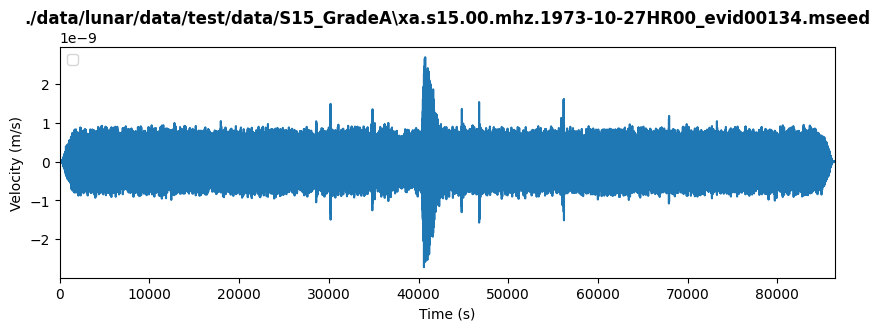

In [16]:
# This is how you get the data and the time, which is in seconds
tr = st.traces[0].copy()
tr_times = tr.times()
tr_data = tr.data
print(tr_data)

# Initialize figure
fig,ax = plt.subplots(1,1,figsize=(10,3))

# Plot trace
ax.plot(tr_times,tr_data)

ax.legend(loc='upper left')

# Make the plot pretty
ax.set_xlim([min(tr_times),max(tr_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')